# Data preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [3]:
numeric_variables = []
with open('dataset.txt', 'r') as file:
    for line in file:
        line = line.strip()
        line = line.replace('\'', '').replace('\\', '\'').replace('\'"', '"')

        data = line.split(',', 1)[1]
        n = data.count(',')
        data = data.replace(',', '', n - 13)
        data = data.split(',')
        numeric_variables.append(data)

df = pd.DataFrame(numeric_variables, columns=['Title', 'Artist', 'Genre', 'Year', 'BPM', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'])
df.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
X = df.drop(columns='Year')
Y = df['Year']

In [5]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

### Analysis

In [7]:
df_train.isnull().sum()

Title           0
Artist          0
Genre           0
Year            0
BPM             0
Energy          0
Danceability    0
Loudness        0
Liveness        0
Valence         0
Length          0
Acousticness    0
Speechiness     0
Popularity      0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 482 to 684
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1395 non-null   object
 1   Artist        1395 non-null   object
 2   Genre         1395 non-null   object
 3   Year          1395 non-null   object
 4   BPM           1395 non-null   object
 5   Energy        1395 non-null   object
 6   Danceability  1395 non-null   object
 7   Loudness      1395 non-null   object
 8   Liveness      1395 non-null   object
 9   Valence       1395 non-null   object
 10  Length        1395 non-null   object
 11  Acousticness  1395 non-null   object
 12  Speechiness   1395 non-null   object
 13  Popularity    1395 non-null   object
dtypes: object(14)
memory usage: 163.5+ KB


Converting columns to string / int 

In [9]:
for header in df_train.columns[3:10]:
    df_train[header] = df_train[header].astype(int)
for header in df_train.columns[11:]:
    df_train[header] = df_train[header].astype(int)

In [10]:
df_train[df_train["Length"].str.contains("\.")==True]

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
842,Echoes,Pink Floyd,album rock,1971,134,32,28,-17,11,14,1.412,37,4,58
904,Close to the Edge (i. The Solid Time of Change...,Yes,album rock,1972,81,60,22,-11,41,25,1.121,27,6,47
1982,Get Ready,Rare Earth,blues rock,1969,127,87,41,-6,83,65,1.292,0,4,45
951,Autobahn - 2009 Remaster,Kraftwerk,dance rock,1974,82,50,33,-16,13,11,1.367,11,4,48


Manually corrected

In [11]:
df_train["Length"] = df_train["Length"].replace(["1.412","1.121","1.367","1.292"], ['1412','1121','1367','1292'])
df_train["Length"] = df_train["Length"].astype(int)

In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1395.0,1992.931183,16.064866,1958.0,1979.0,1993.0,2007.0,2019.0
BPM,1395.0,121.298208,27.917509,37.0,100.0,120.0,136.0,205.0
Energy,1395.0,59.939785,21.966208,5.0,43.0,62.0,78.0,100.0
Danceability,1395.0,53.384946,15.146825,10.0,43.0,54.0,64.0,96.0
Loudness,1395.0,-8.989964,3.617852,-27.0,-11.0,-8.0,-6.0,-2.0
Liveness,1395.0,19.264516,17.079135,2.0,9.0,12.0,23.5,98.0
Valence,1395.0,49.970609,24.722445,3.0,29.0,48.0,70.0,99.0
Length,1395.0,264.085305,99.586602,102.0,212.0,246.0,290.0,1412.0
Acousticness,1395.0,28.690323,28.617627,0.0,4.0,18.0,49.0,98.0
Speechiness,1395.0,5.013620,4.468826,2.0,3.0,4.0,5.0,55.0


## Data preprocessing

#### Title
We have 1372 unique values out of 1395. By intuition, this feature will not provide any intuition about the year of release.  

In [13]:
df_train['Title'].nunique(), len(df_train)

(1372, 1395)

In [14]:
df_train = df_train.drop(labels=['Title'], axis=1)

Check if we have any duplicated song

In [15]:
df_train.duplicated().sum()

0

#### Artist

In [16]:
df_train['Artist'].nunique()

608

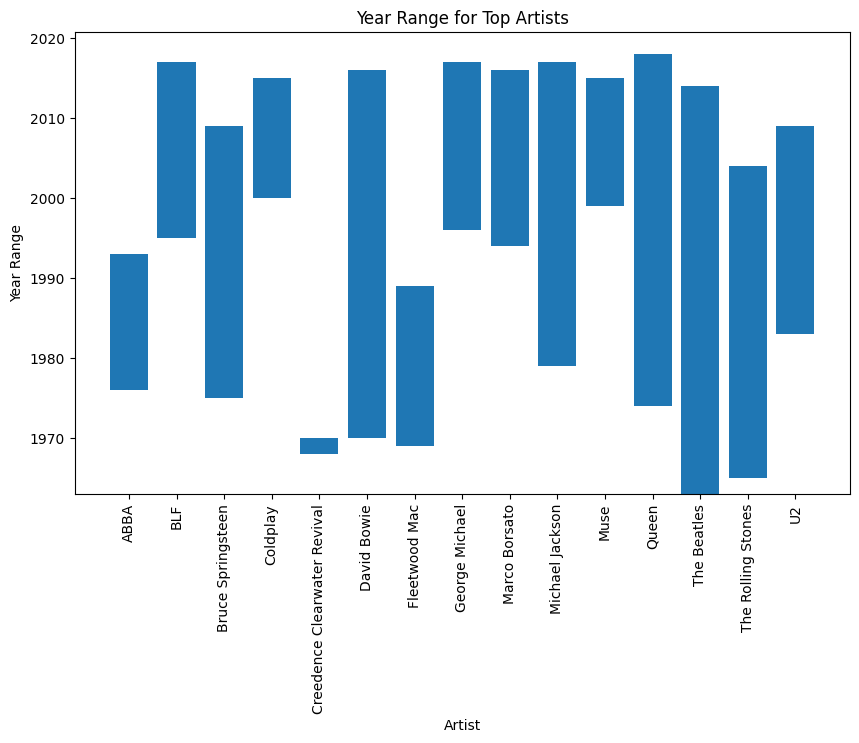

In [17]:
df_train = df_train.drop(columns=['Artist'])

Artist can help us narrow down the possible year for a song.

#### Genre

In [18]:
df_train['Genre'].nunique()

133

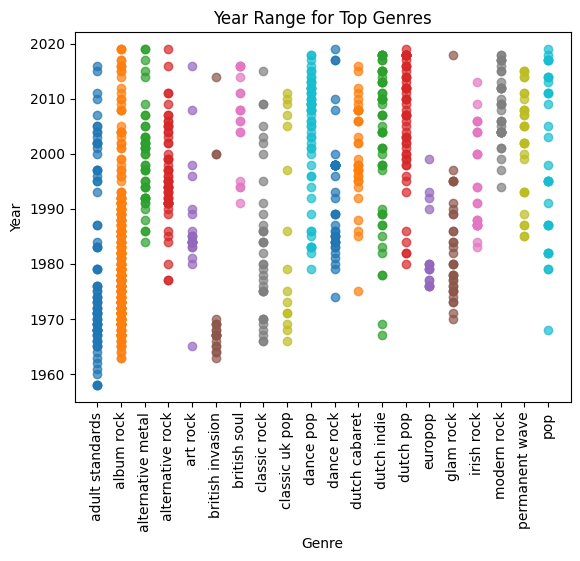

In [19]:
top_genres = df_train['Genre'].value_counts().head(20).index
df_train_topGenres = df_train[df_train['Genre'].isin(top_genres)]

fig, ax = plt.subplots()
for genre, group in df_train_topGenres.groupby('Genre'):
    ax.scatter([genre] * len(group), group['Year'], label=genre, alpha=0.7)

ax.set_xlabel('Genre')
ax.set_ylabel('Year')
ax.set_title('Year Range for Top Genres')
plt.xticks(rotation=90)
plt.show()

In [20]:
df_train['Genre'].value_counts().unique()

array([303,  83,  59,  57,  55,  45,  43,  38,  36,  34,  30,  26,  22,
        21,  18,  16,  15,  14,  13,  12,  11,   9,   8,   7,   6,   5,
         4,   3,   2,   1])

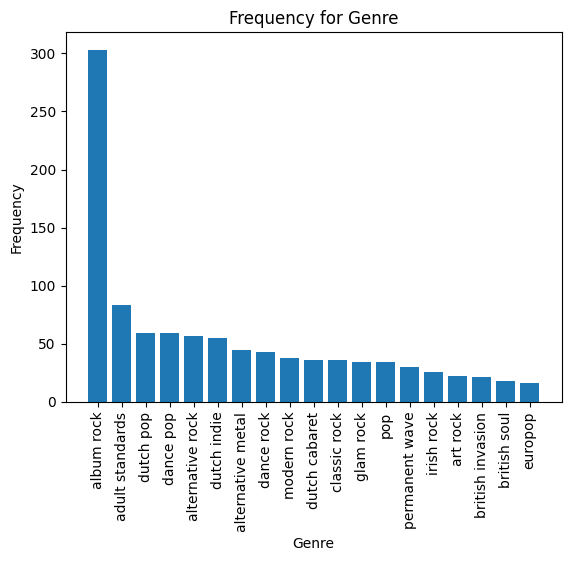

In [21]:
fig, ax = plt.subplots()
top_genres = df_train['Genre'].value_counts()
top_genres = top_genres[top_genres > 15]
ax.bar(top_genres.index, top_genres)

ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
ax.set_title('Frequency for Genre')
plt.xticks(rotation=90)
plt.show()


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

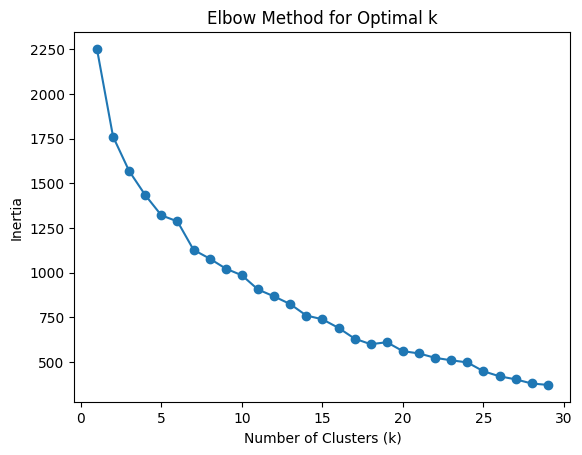

In [23]:
vectorizer = CountVectorizer()
df_train_vectorizer = vectorizer.fit_transform(df_train['Genre']).toarray()

inertia_values = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_train_vectorizer)
    inertia_values.append(kmeans.inertia_);

plt.plot(range(1, 30), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [24]:
# Apply K-Means clustering with the desired number of clusters
kmeans = KMeans(n_clusters=8, random_state=0);
df_train['GenreCluster'] = kmeans.fit_predict(df_train_vectorizer);
for cluster_id in range(df_train['GenreCluster'].nunique()):
    cluster_genres = df_train[df_train['GenreCluster'] == cluster_id]['Genre'].unique()
    print(f"Cluster {cluster_id}: {', '.join(cluster_genres)}")

Cluster 0: album rock, irish rock, glam rock, art rock, classic rock, garage rock, belgian rock, blues rock, australian rock, celtic rock, soft rock, canadian rock, classic canadian rock, rock-and-roll
Cluster 1: permanent wave, contemporary vocal jazz, classic schlager, europop, chanson, punk, classic soul, big room, blues, metropopolis, boy band, big beat, canadian folk, british soul, british invasion, neo mellow, detroit hip hop, mellow gold, compositional ambient, gabba, folk, afropop, britpop, g funk, latin jazz, disco, neo soul, carnaval limburg, reggae, funk, scottish singer-songwriter, eurodance, glam metal, celtic, downtempo, edm, motown, arkansas country, electro, basshall, classic soundtrack, levenslied, christelijk, irish singer-songwriter, reggae fusion, bebop, electronica, celtic punk, british singer-songwriter, streektaal, nederpop, east coast hip hop, british folk, electropop, diva house, australian psych, cyberpunk, alaska indie, latin, austropop, ccm, finnish metal, t

In [26]:
df_train

,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,GenreCluster
482,Imagine Dragons,modern rock,2012,136,78,45,-4,67,24,187,11,6,73,2
842,Pink Floyd,album rock,1971,134,32,28,-17,11,14,1412,37,4,58,0
372,Kaiser Chiefs,alternative rock,2007,93,93,44,-3,8,40,203,1,5,62,5
576,Coldplay,permanent wave,2014,93,48,74,-9,11,36,285,3,4,73,1
211,Tavares,adult standards,2004,117,75,61,-9,39,97,394,1,3,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Curtis Mayfield,chicago soul,1970,139,97,54,-6,12,93,166,42,9,67,1
1216,Het Goede Doel,dutch pop,1982,141,66,58,-14,7,66,361,1,4,52,7
1653,Nirvana,alternative rock,1994,115,39,62,-12,91,44,196,68,4,57,5
559,Robin Thicke,dance pop,2013,120,60,85,-5,8,84,264,0,4,76,6


In [27]:
df_train = df_train.drop(columns='Genre')
df_train['GenreCluster'] = df_train['GenreCluster'].astype(str)
df_train.head()

,Artist,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,GenreCluster
482,Imagine Dragons,2012,136,78,45,-4,67,24,187,11,6,73,2
842,Pink Floyd,1971,134,32,28,-17,11,14,1412,37,4,58,0
372,Kaiser Chiefs,2007,93,93,44,-3,8,40,203,1,5,62,5
576,Coldplay,2014,93,48,74,-9,11,36,285,3,4,73,1
211,Tavares,2004,117,75,61,-9,39,97,394,1,3,49,4


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 482 to 684
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Artist        1395 non-null   object
 1   Year          1395 non-null   int64 
 2   BPM           1395 non-null   int64 
 3   Energy        1395 non-null   int64 
 4   Danceability  1395 non-null   int64 
 5   Loudness      1395 non-null   int64 
 6   Liveness      1395 non-null   int64 
 7   Valence       1395 non-null   int64 
 8   Length        1395 non-null   int64 
 9   Acousticness  1395 non-null   int64 
 10  Speechiness   1395 non-null   int64 
 11  Popularity    1395 non-null   int64 
 12  GenreCluster  1395 non-null   object
dtypes: int64(11), object(2)
memory usage: 152.6+ KB


## Test dataset preprocessing

In [29]:
for header in df_test.columns[3:10]:
    df_test[header] = df_test[header].astype(int)
for header in df_test.columns[11:]:
    df_test[header] = df_test[header].astype(int)

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, 1805 to 1847
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         599 non-null    object
 1   Artist        599 non-null    object
 2   Genre         599 non-null    object
 3   Year          599 non-null    int64 
 4   BPM           599 non-null    int64 
 5   Energy        599 non-null    int64 
 6   Danceability  599 non-null    int64 
 7   Loudness      599 non-null    int64 
 8   Liveness      599 non-null    int64 
 9   Valence       599 non-null    int64 
 10  Length        599 non-null    object
 11  Acousticness  599 non-null    int64 
 12  Speechiness   599 non-null    int64 
 13  Popularity    599 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 70.2+ KB


In [31]:
df_test[df_test["Length"].str.contains("\.")==True]

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity


In [32]:
df_test = df_test.drop(labels=['Title'], axis=1)
df_test = df_test.drop(columns=['Artist'])

In [33]:
df_test.duplicated().sum()

0

In [34]:
df_test_vectorizer = vectorizer.transform(df_test['Genre']).toarray()
df_test['GenreCluster'] = kmeans.predict(df_test_vectorizer);

In [35]:
df_test

,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,GenreCluster
1805,Red Hot Chili Peppers,alternative rock,1999,123,80,46,-3,8,51,255,0,6,78,5
1311,Falco,austropop,1985,106,66,65,-10,19,45,356,45,5,58,1
960,Barry Manilow,adult standards,1974,104,46,31,-9,14,32,213,42,3,69,4
107,Armand,dutch rock,2009,101,69,62,-7,6,56,208,28,3,47,7
1557,Queen,glam rock,1991,116,83,64,-6,19,31,263,57,5,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Frank Boeijen Groep,dutch cabaret,1987,125,47,60,-14,11,53,318,70,3,37,7
2,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,5
1526,Queen,glam rock,1991,83,69,31,-7,11,18,278,41,3,58,0
1696,Faithless,big beat,1996,127,58,79,-10,17,26,527,18,4,55,1


In [36]:
df_test = df_test.drop(columns='Genre')
df_test['GenreCluster'] = df_test['GenreCluster'].astype(str)
df_test.head()

,Artist,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,GenreCluster
1805,Red Hot Chili Peppers,1999,123,80,46,-3,8,51,255,0,6,78,5
1311,Falco,1985,106,66,65,-10,19,45,356,45,5,58,1
960,Barry Manilow,1974,104,46,31,-9,14,32,213,42,3,69,4
107,Armand,2009,101,69,62,-7,6,56,208,28,3,47,7
1557,Queen,1991,116,83,64,-6,19,31,263,57,5,48,0


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, 1805 to 1847
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Artist        599 non-null    object
 1   Year          599 non-null    int64 
 2   BPM           599 non-null    int64 
 3   Energy        599 non-null    int64 
 4   Danceability  599 non-null    int64 
 5   Loudness      599 non-null    int64 
 6   Liveness      599 non-null    int64 
 7   Valence       599 non-null    int64 
 8   Length        599 non-null    object
 9   Acousticness  599 non-null    int64 
 10  Speechiness   599 non-null    int64 
 11  Popularity    599 non-null    int64 
 12  GenreCluster  599 non-null    object
dtypes: int64(10), object(3)
memory usage: 65.5+ KB


## One hot encoding

In [38]:
combined_data = pd.concat([df_train, df_test])

genre_dummies = pd.get_dummies(combined_data, columns=['GenreCluster'], prefix='genre', dtype=int)
data_encoded = pd.concat([combined_data, genre_dummies], axis=1)
data_encoded = data_encoded.drop(['GenreCluster'], axis=1)


df_train = data_encoded[:len(df_train)]
df_test = data_encoded[len(df_train):]

df_train = df_train.loc[:, ~df_train.columns.duplicated()]
df_test = df_test.loc[:, ~df_test.columns.duplicated()]

In [39]:
df_train

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,...,artist_blink-182,artist_dith Piaf,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
482,2012,136,78,45,-4,67,24,187,11,6,...,0,0,0,0,1,0,0,0,0,0
842,1971,134,32,28,-17,11,14,1412,37,4,...,0,0,1,0,0,0,0,0,0,0
372,2007,93,93,44,-3,8,40,203,1,5,...,0,0,0,0,0,0,0,1,0,0
576,2014,93,48,74,-9,11,36,285,3,4,...,0,0,0,1,0,0,0,0,0,0
211,2004,117,75,61,-9,39,97,394,1,3,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1970,139,97,54,-6,12,93,166,42,9,...,0,0,0,1,0,0,0,0,0,0
1216,1982,141,66,58,-14,7,66,361,1,4,...,0,0,0,0,0,0,0,0,0,1
1653,1994,115,39,62,-12,91,44,196,68,4,...,0,0,0,0,0,0,0,1,0,0
559,2013,120,60,85,-5,8,84,264,0,4,...,0,0,0,0,0,0,0,0,1,0


In [40]:
df_test

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,...,artist_blink-182,artist_dith Piaf,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
1805,1999,123,80,46,-3,8,51,255,0,6,...,0,0,0,0,0,0,0,1,0,0
1311,1985,106,66,65,-10,19,45,356,45,5,...,0,0,0,1,0,0,0,0,0,0
960,1974,104,46,31,-9,14,32,213,42,3,...,0,0,0,0,0,0,1,0,0,0
107,2009,101,69,62,-7,6,56,208,28,3,...,0,0,0,0,0,0,0,0,0,1
1557,1991,116,83,64,-6,19,31,263,57,5,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1987,125,47,60,-14,11,53,318,70,3,...,0,0,0,0,0,0,0,0,0,1
2,2001,168,69,66,-9,7,52,341,2,17,...,0,0,0,0,0,0,0,1,0,0
1526,1991,83,69,31,-7,11,18,278,41,3,...,0,0,1,0,0,0,0,0,0,0
1696,1996,127,58,79,-10,17,26,527,18,4,...,0,0,0,1,0,0,0,0,0,0


In [41]:
df_train.to_csv('./datasets/data_train.csv', index=False)
df_test.to_csv('./datasets/data_test.csv', index=False)